# 4. Analysis Module Tutorial

This notebook demonstrates how to use the `analyze.py` module to analyze a smoothed sarcomere length signal. It loads the smoothed signal file generated in the previous step and uses it to detect states of the cell.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

# Import the core function from your module
from src.analyze import analyze_signal, plot_signal_with_regions

# --- Configuration ---
INPUT_DIR = Path("data")
OUTPUT_DIR = Path("results")

ND2_FILENAME = "Quartz.2862.D1.Myk.baseline.GFP.m002.nd2" # <<< IMPORTANT: CHANGE THIS TO YOUR ND2 FILE NAME
OUTPUT_FILENAME = ND2_FILENAME[:-4]

# Define paths
OUTPUT_DIR.mkdir(parents=True, exist_ok=True) # Ensure output directory exists

Saved analysis results to results/Quartz.2862.D1.Myk.baseline.GFP.m002_cell_state.json


/projectnb/lejlab2/saeed/all-sarcgraph/adam-data-new-high-framerate/sarcgraph-video/src/analyze.py:275: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(time_array[start_idx], time_array[end_idx],
/projectnb/lejlab2/saeed/all-sarcgraph/adam-data-new-high-framerate/sarcgraph-video/src/analyze.py:310: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  relaxed_patch = plt.Rectangle((0,0), 1, 1, color=relaxed_color, alpha=0.7,


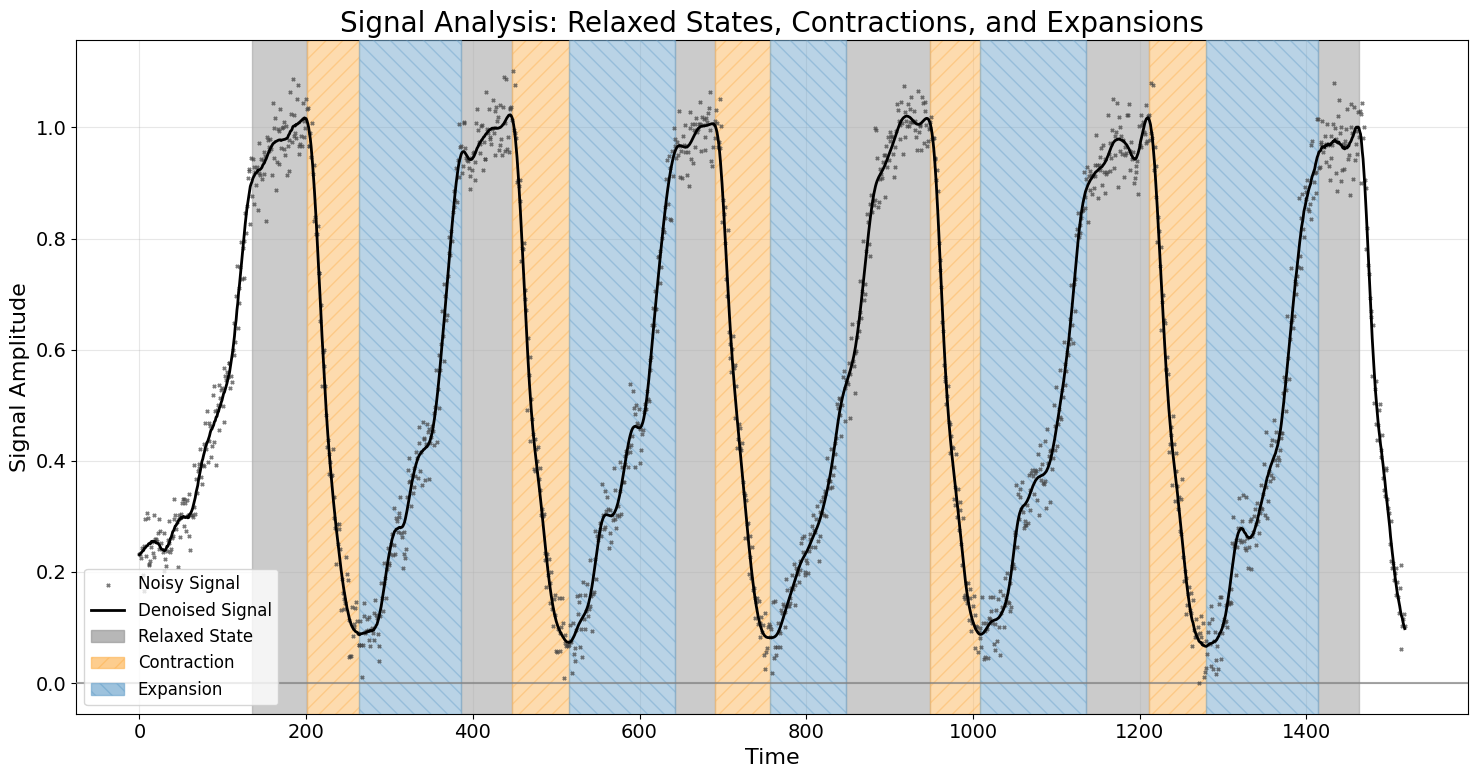

In [2]:
# Load denoised sarcomere length data
smoothed_csv_path = OUTPUT_DIR / f"{OUTPUT_FILENAME}_denoised_sarcomere_length.csv"
smoothed_df = pd.read_csv(smoothed_csv_path)
frames_smoothed = smoothed_df['frame'].values
smoothed_signal = smoothed_df['length_smoothed'].values

# Load noisy sarcomere length data
sarcomeres_csv_path = OUTPUT_DIR / f"{OUTPUT_FILENAME}_detection_results_sarcomeres.csv"
sarcomeres_df = pd.read_csv(sarcomeres_csv_path)
frames_noisy = sarcomeres_df.groupby("frame")["frame"].mean().values
noisy_signal = sarcomeres_df.groupby("frame")["length"].mean().values

analysis_results = analyze_signal(
    signal=smoothed_signal,
    time_array=frames_smoothed,
    output_path=OUTPUT_DIR / f"{OUTPUT_FILENAME}_cell_state.json",
)

plot_signal_with_regions(
    signal=smoothed_signal - np.min(noisy_signal),
    noisy_signal=noisy_signal - np.min(noisy_signal),
    analysis_results=analysis_results,
    time_array=frames_smoothed
)
plt.show()